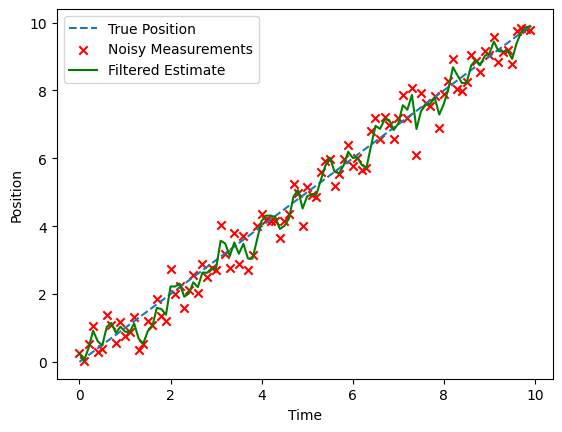

In [14]:
import numpy as np
from filterpy.kalman import KalmanFilter
import matplotlib.pyplot as plt

# Define the true motion parameters
initial_position = 0
velocity = 1
process_noise = 0.1

# Simulate noisy measurements
np.random.seed(42)
true_position = initial_position + velocity * np.arange(0, 10, 0.1)
noisy_measurements = true_position + np.random.normal(0, 0.5, size=len(true_position))

# Initialize Kalman filter
kf = KalmanFilter(dim_x=2, dim_z=1)
kf.F = np.array([[1, 1],
                 [0, 1]])  # State transition matrix
kf.H = np.array([[1, 0]])  # Measurement matrix
kf.P *= 1e3  # Covariance matrix
kf.R = 0.5  # Measurement noise
kf.Q = np.array([[0.1, 0.1],
                 [0.1, 0.1]])  # Process noise

# Initialize state
kf.x = np.array([0, 0])

# Kalman filter update
filtered_state_means = []
for measurement in noisy_measurements:
    kf.predict()
    kf.update(measurement)
    filtered_state_means.append(kf.x[0])

# Plot the true position, noisy measurements, and filtered estimates
plt.plot(np.arange(0, 10, 0.1) * velocity, true_position, label='True Position', linestyle='dashed')
plt.scatter(np.arange(0, 10, 0.1) * velocity, noisy_measurements, label='Noisy Measurements', color='red', marker='x')
plt.plot(np.arange(0, 10, 0.1) * velocity, filtered_state_means, label='Filtered Estimate', color='green')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()